# Bank Customer Churn Prediction 

In this project, we use supervised learning models to identify customers who are likely to churn in the future. Furthermore, we will analyze top factors that influence user retention. [Dataset information](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers).


This project mainly focus on data exploration, feature engineering, and model training and evaluation.


## Contents


* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)

# Part 0: Data Collection
check this [link](https://colab.research.google.com/notebooks/io.ipynb) for more info

In [ ]:
# install pydrive to load data # the code below is from colab official documents. If your data is big, use below way to load data.
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# the same way we get id from last class
#https://drive.google.com/file/d/1szdCZ98EK59cfJ4jG03g1HOv_OhC1oyN/view?usp=sharing
id = "17nbs4OBtrj7kq40Lf9laopynyp4LJDGn"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('bank_churn.csv')

In [ ]:
#data collection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
churn_df = pd.read_csv('bank_churn.csv')
churn_df.head()
# Tenure means how long does the users use the service
# exit 1 means user closed accounts
# exit 0 means user still open accounts

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Part 1: Data Exploration

### Part 1.1: General Information of Raw Dataset

In [ ]:
# check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# check the unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Get target variable
y = churn_df['Exited']

### Part 1.2:  Understand the features

In [ ]:
# check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# understand Numerical feature
numerical_features = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']
churn_df[numerical_features].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


[Text(0.5, 1.0, 'Estimated Salary')]

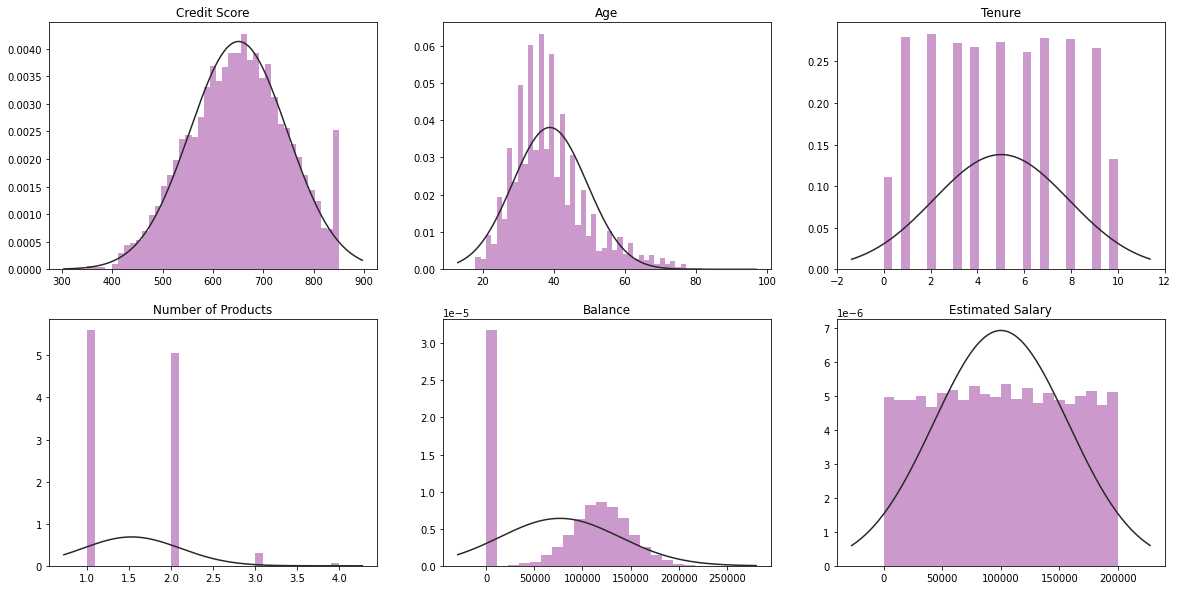

In [ ]:
# distplot for numerical feature
from scipy.stats import norm
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.distplot(x=churn_df['CreditScore'],fit = norm, kde=False, color = 'purple',ax=axss[0][0]).set(title='Credit Score')
sns.distplot(x=churn_df['Age'],fit=norm, kde=False, color = 'purple',ax=axss[0][1]).set(title = 'Age')
sns.distplot(x=churn_df['Tenure'],fit=norm, kde=False, color = 'purple',ax=axss[0][2]).set(title = 'Tenure')
sns.distplot(x=churn_df['NumOfProducts'],fit=norm, kde=False, color = 'purple',ax=axss[1][0]).set(title = 'Number of Products')
sns.distplot(x=churn_df['Balance'],fit=norm, kde=False, color = 'purple',ax=axss[1][1]).set(title = 'Balance')
sns.distplot(x=churn_df['EstimatedSalary'],fit=norm, kde=False, color = 'purple',ax=axss[1][2]).set(title = 'Estimated Salary')

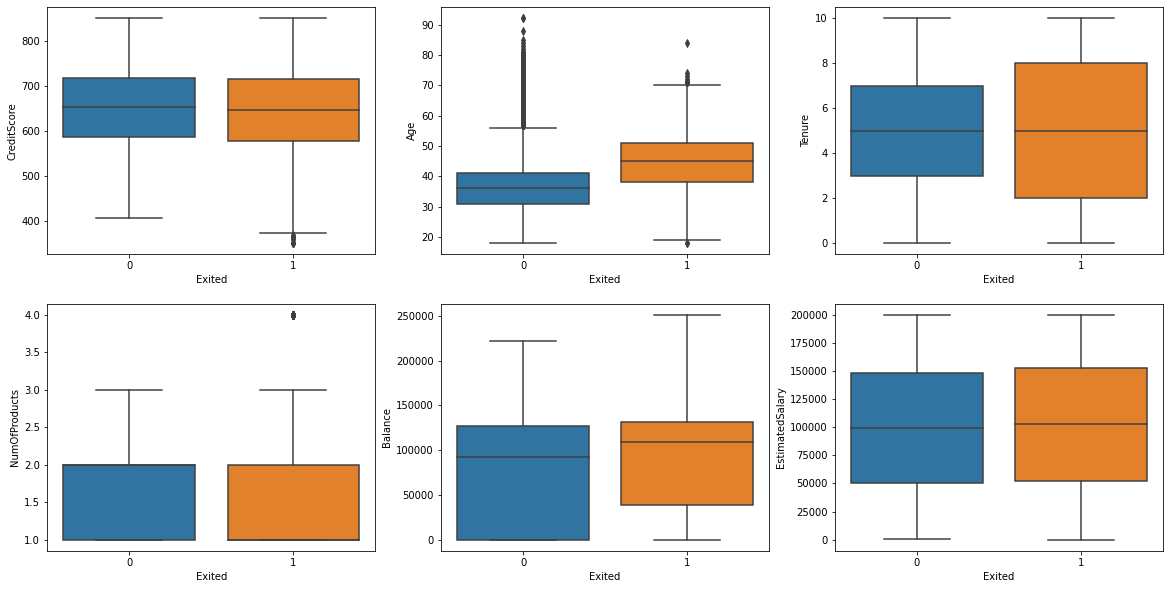

In [ ]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])


0    7963
1    2037
Name: Exited, dtype: int64


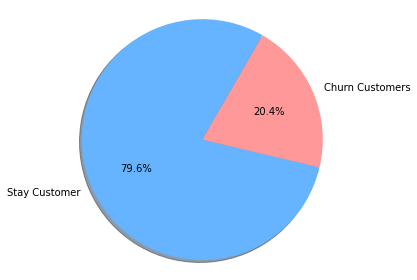

In [ ]:
print(churn_df['Exited'].value_counts())
ExitedValues = churn_df['Exited'].value_counts()
labels = ["Stay Customer","Churn Customers"]
colors = ['#66b3ff', '#ff9999']
fig1, ax = plt.subplots()
ax.pie(ExitedValues,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
ax.axis('equal')
plt.tight_layout()
plt.show()

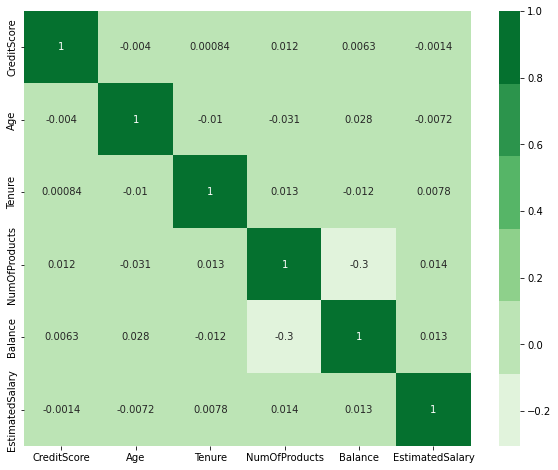

In [ ]:
# correlations between features
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.color_palette("Greens")
sns.heatmap(corr_score, cmap=colormap, annot=True)

[Text(0, 0, 'Yes'), Text(0, 0, 'No')]

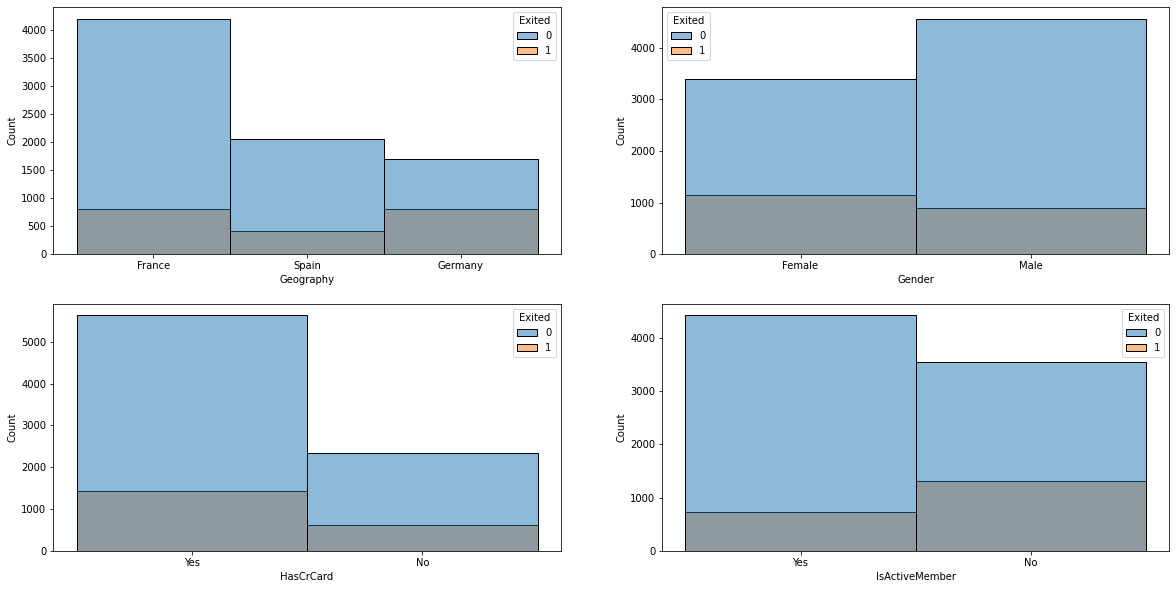

In [ ]:
# understand categorical feature
df_churn = churn_df.copy()
df_churn['HasCrCard'] = df_churn['HasCrCard'].astype(str)
df_churn['IsActiveMember'] = df_churn['IsActiveMember'].astype(str)
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.histplot(x='Geography',hue='Exited',data=churn_df,ax=axss[0][0])
sns.histplot(x='Gender', hue='Exited', data=churn_df, ax=axss[0][1])
ax1 = sns.histplot(x='HasCrCard', hue='Exited', data=df_churn,ax=axss[1][0])
ax1.set_xticklabels(['Yes', 'No'])
ax2 = sns.histplot(x='IsActiveMember', hue='Exited', data=df_churn, ax=axss[1][1])
ax2.set_xticklabels(['Yes', 'No'])

# Part 2: Feature Preprocessing 

In [ ]:
# Get feature space by dropping useless feature # convert to the feature that model can be used
drop_features = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(drop_features,axis=1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [ ]:
categorical_cols = X.columns[X.dtypes == 'O']
numerical_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
numerical_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
categorical_cols

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1) 
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder()
enc.fit(X_train[['Geography']])
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.transform(X_train[['Geography']]).toarray(), columns=enc.get_feature_names(['Geography']))
# merge with main df b on key values
X_train = pd.concat([X_train.reset_index(drop=True), enc_df], axis=1).drop(['Geography'], axis=1)


In [ ]:
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.transform(X_test[['Geography']]).toarray(), columns=enc.get_feature_names(['Geography']))
# merge with main df b on key values
X_test = pd.concat([X_test.reset_index(drop=True), enc_df], axis=1).drop(['Geography'], axis=1)

In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [ ]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[['Gender']])
X_train[['Gender']] = enc_oe.transform(X_train[['Gender']])
X_test[['Gender']] = enc_oe.transform(X_test[['Gender']])

In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


Standardize/Normalize Data

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols]) 
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
X_train.head() 

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0


# Part 3: Model Training and Result Evaluation

###Part 3.1: Build Model and Use Grid Search to Find Optimal Hyperparameters


In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def grid_search_scoring_metrics(x):
    print ("Best score: " + str(x.best_score_))
    print ("Best parameters:")
    best_parameters = x.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.1.1: Find Optimal Hyperparameters - LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_m = LogisticRegression()
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.001, 0.01, 0.05, 0.1, 0.2, 1,5,10),
    'solver':['liblinear']
}
Grid_LR = GridSearchCV(logistic_m,parameters,cv=5) 
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': (0.001, 0.01, 0.05, 0.1, 0.2, 1, 5, 10),
                         'penalty': ('l1', 'l2'), 'solver': ['liblinear']})

In [ ]:
#best score for whole model
grid_search_scoring_metrics(Grid_LR)

Best score: 0.8125333333333333
Best parameters:
C:1
penalty:l1
solver:liblinear


In [ ]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [ ]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# best score only for test set
best_LR_model.score(X_test, y_test)

0.8092

#### Part 3.1.2: Find Optimal Hyperparameters: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
KNN_m = KNeighborsClassifier()
parameters = {
    'n_neighbors':[1,3,5,7,9,11,13,15],
    'weights': ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

Grid_KNN = GridSearchCV(KNN_m,parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
# best k
grid_search_scoring_metrics(Grid_KNN)

Best score: 0.8454666666666666
Best parameters:
metric:minkowski
n_neighbors:13
weights:distance


In [ ]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.1.3: Find Optimal Hyperparameters: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_m = RandomForestClassifier()
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10],
    'criterion': ['entropy', 'gini'],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]

}
Grid_RF = GridSearchCV(RF_m,parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [60, 80, 100]})

In [ ]:
# best number of tress
grid_search_scoring_metrics(Grid_RF)

Best score: 0.8672000000000001
Best parameters:
criterion:entropy
max_depth:10
max_features:sqrt
min_samples_leaf:3
min_samples_split:5
n_estimators:100


In [ ]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [ ]:
best_RF_model

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=5)

####Part 3.2: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0] # actual positive predict negative so False Negative
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    F1_score = (2 * precision * recall)/(precision + recall)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ("F1 Score is: " + str(F1_score))
    print ()

# print out confusion matrices
# def draw_confusion_matrices(confusion_matricies):
#     for cm in confusion_matrices:
#         classifier, cm = cm[0], cm[1]
#         cal_evaluation(classifier, cm)

([<matplotlib.axis.YTick at 0x7f4513029b90>,
 [Text(0, 0.5, '0 - Stay'), Text(0, 1.5, '1 - Exit')])

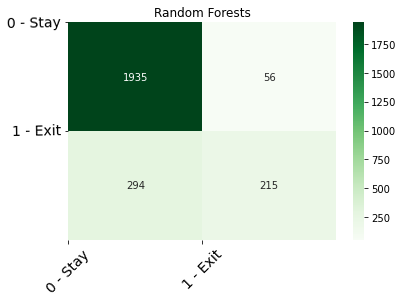

In [ ]:
# Random forest
classes = ['0 - Stay', '1 - Exit']
tick_marks = np.arange(len(classes))
sns.heatmap(confusion_matrix(y_test,best_RF_model.predict(X_test)), cmap=plt.cm.Greens, annot = True, fmt='g').set(title = 'Random Forests')
plt.xticks(tick_marks, classes, rotation=45, size = 14)
plt.yticks(tick_marks, classes, rotation=1, size = 14)

([<matplotlib.axis.YTick at 0x7f4512faaf10>,
 [Text(0, 0.5, '0 - Stay'), Text(0, 1.5, '1 - Exit')])

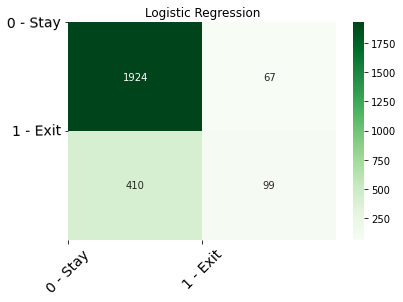

In [ ]:
# Logistic Regression
classes = ['0 - Stay', '1 - Exit']
tick_marks = np.arange(len(classes))
sns.heatmap(confusion_matrix(y_test,best_LR_model.predict(X_test)), cmap=plt.cm.Greens, annot = True, fmt='g').set(title = 'Logistic Regression')
plt.xticks(tick_marks, classes, rotation=45, size = 14)
plt.yticks(tick_marks, classes, rotation=1, size = 14)

([<matplotlib.axis.YTick at 0x7f451332cd10>,
 [Text(0, 0.5, '0 - Stay'), Text(0, 1.5, '1 - Exit')])

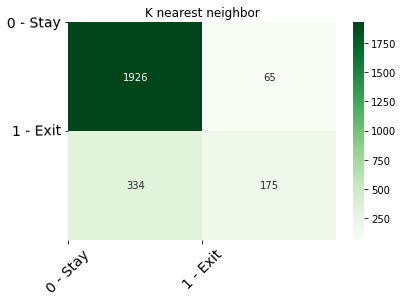

In [ ]:
# K Nearest Neighbor
classes = ['0 - Stay', '1 - Exit']
tick_marks = np.arange(len(classes))
sns.heatmap(confusion_matrix(y_test, best_KNN_model.predict(X_test)), cmap=plt.cm.Greens, annot = True, fmt='g').set(title = "K nearest neighbor")
plt.xticks(tick_marks, classes, rotation=45, size = 14)
plt.yticks(tick_marks, classes, rotation=1, size = 14)

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.86
precision is: 0.7933579335793358
recall is: 0.4223968565815324
F1 Score is: 0.5512820512820512

Logistic Regression
Accuracy is: 0.8092
precision is: 0.5963855421686747
recall is: 0.1944990176817289
F1 Score is: 0.2933333333333334

K nearest neighbor
Accuracy is: 0.8404
precision is: 0.7291666666666666
recall is: 0.343811394891945
F1 Score is: 0.4672897196261683



### Part 3.3: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.3.1: ROC of RF Model

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1] # predict churn probability 
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf) #ROC curve function  fpr_rf: false positive rate  tpr_rf: true positive rate

In [ ]:
best_RF_model.predict_proba(X_test) # [0][0] means label 0 (not churn) [0][1] means label 1 (churn)

array([[0.718246  , 0.281754  ],
       [0.92758302, 0.07241698],
       [0.71880697, 0.28119303],
       ...,
       [0.87845474, 0.12154526],
       [0.91802283, 0.08197717],
       [0.93066346, 0.06933654]])

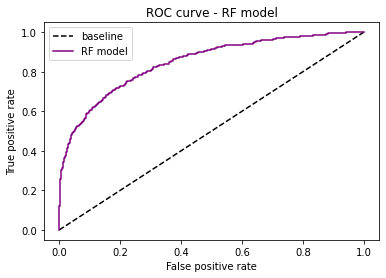

In [ ]:
# ROC curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--', label = 'baseline')
plt.plot(fpr_rf, tpr_rf, 'purple',label='RF model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn import metrics
metrics.auc(fpr_rf,tpr_rf)

0.8484230116072424

#### Part 3.3.2: ROC of LR Model

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

In [ ]:
best_LR_model.predict_proba(X_test) # 2d array

array([[0.82434936, 0.17565064],
       [0.93171193, 0.06828807],
       [0.8552184 , 0.1447816 ],
       ...,
       [0.71448509, 0.28551491],
       [0.89278022, 0.10721978],
       [0.85562115, 0.14437885]])

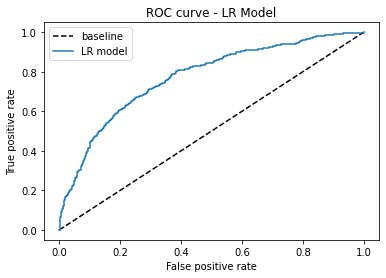

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--', label = 'baseline')
plt.plot(fpr_lr, tpr_lr, label='LR model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7722077442795132

#### Part 3.3.3: ROC of KNN Model

In [ ]:
y_pred_lr = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

In [ ]:
best_KNN_model.predict_proba(X_test)

array([[0.93351451, 0.06648549],
       [1.        , 0.        ],
       [0.79617084, 0.20382916],
       ...,
       [0.82661807, 0.17338193],
       [1.        , 0.        ],
       [1.        , 0.        ]])

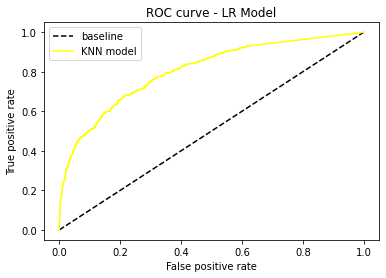

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--', label = 'baseline')
plt.plot(fpr_lr, tpr_lr, 'yellow',label='KNN model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.805415627692001

# Part 4: Random Forest Model - Feature Importance Discussion

In [ ]:
X_RF = X.copy()
enc_ = OneHotEncoder()
enc_RF = pd.DataFrame(enc_.fit_transform(X_RF[['Geography']]).toarray(), columns=enc_.get_feature_names(['Geography']))
X_RF= pd.concat([X_RF.reset_index(drop=True), enc_RF], axis=1).drop(['Geography'], axis=1)
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])
X_RF.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [ ]:
forest = RandomForestClassifier()
forest.fit(X_RF, y) # use X_RF that processed by one hot encoding and original y to do feature importance
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))


Feature importance ranking by Random Forest Model:
Age : 0.2384
EstimatedSalary : 0.1464
Balance : 0.1432
CreditScore : 0.1431
NumOfProducts : 0.1299
Tenure : 0.0823
IsActiveMember : 0.0415
Geography_Germany : 0.0205
Gender : 0.0186
HasCrCard : 0.018


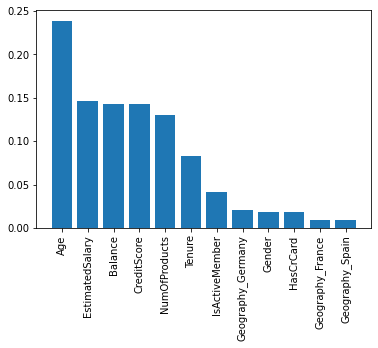

In [ ]:
feature_name = X_RF.columns.values # return an array of columns name index
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()